In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from read_cats import GetSDSSCat
from stackocat import QSOcat
from astropy.visualization import hist
from utils import WISEMag2mJy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Redshift bins
zbins = [(1.,5.)]#[(1.,2.15), (2.15,2.50),(2.50,5.0)]

# Reading in QSO catalogs
qso_cat = QSOcat(GetSDSSCat(cats=['DR7', 'DR12'], discard_FIRST=True, z_DR12='Z_PIPE'), zbins, W4only=True)


	...z-bin : 1.0 < z < 5.0


In [ ]:
hist(qso_cat.cat[0].W1SNR.dropna(), 'knuth')

NameError: name 'qso_cat' is not defined

In [ ]:
plt.figure(figsize=(6,10))

for i in xrange(len(qso_cat.zbins)):
    plt.subplot(3,1,1+i)
    plt.title(r' $%.2f < z < %.2f$' %(qso_cat.zbins[i][0],qso_cat.zbins[i][1]))
    hist(qso_cat.cat[i].W1SNR.dropna(), histtype='step', label='W1: %.2f' %(1.*qso_cat.cat[i].W1SNR.dropna()[qso_cat.cat[i].W1SNR.dropna()>5.].size/qso_cat.cat[i].W1SNR.dropna().size))
    hist(qso_cat.cat[i].W2SNR.dropna(), histtype='step', label='W2: %.2f' %(1.*qso_cat.cat[i].W2SNR.dropna()[qso_cat.cat[i].W2SNR.dropna()>5.].size/qso_cat.cat[i].W2SNR.dropna().size))
    hist(qso_cat.cat[i].W3SNR.dropna(), histtype='step', label='W3: %.2f' %(1.*qso_cat.cat[i].W3SNR.dropna()[qso_cat.cat[i].W3SNR.dropna()>5.].size/qso_cat.cat[i].W3SNR.dropna().size))
    hist(qso_cat.cat[i].W4SNR.dropna(), histtype='step', label='W4: %.2f' %(1.*qso_cat.cat[i].W4SNR.dropna()[qso_cat.cat[i].W4SNR.dropna()>5.].size/qso_cat.cat[i].W4SNR.dropna().size))
    plt.axvspan(-10, 5, alpha=0.5, color='tomato', label='No detection')
    plt.legend(loc='best')
    plt.xlim(-10,60)

plt.xlabel('S/N', size=15)
plt.savefig('plots/WISE_sources_detected_census.pdf', bboxes_inches='tight')
plt.show()

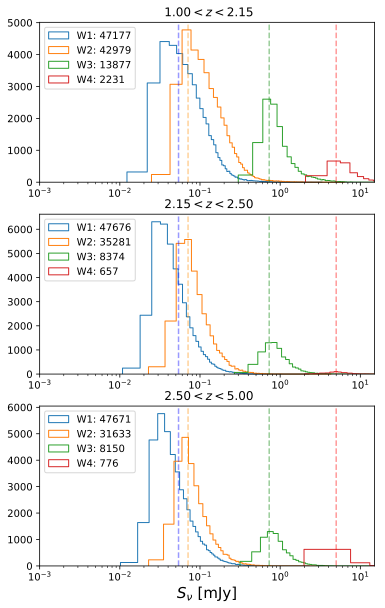

In [124]:
plt.figure(figsize=(6,10))

for i in xrange(len(qso_cat.zbins)):
    plt.subplot(3,1,1+i)
    plt.title(r' $%.2f < z < %.2f$' %(qso_cat.zbins[i][0],qso_cat.zbins[i][1]))
    hist(WISEMag2mJy(qso_cat.cat[i].W1MAG[qso_cat.cat[i].W1SNR>5.],'W1'), 'knuth', histtype='step', label='W1: %d'%(qso_cat.cat[i].W1MAG[qso_cat.cat[i].W1SNR>5.].shape))
    hist(WISEMag2mJy(qso_cat.cat[i].W2MAG[qso_cat.cat[i].W2SNR>5.],'W2'), 'knuth', histtype='step', label='W2: %d'%(qso_cat.cat[i].W2MAG[qso_cat.cat[i].W2SNR>5.].shape))
    hist(WISEMag2mJy(qso_cat.cat[i].W3MAG[qso_cat.cat[i].W3SNR>5.],'W3'), 'knuth', histtype='step', label='W3: %d'%(qso_cat.cat[i].W3MAG[qso_cat.cat[i].W3SNR>5.].shape))
    hist(WISEMag2mJy(qso_cat.cat[i].W4MAG[qso_cat.cat[i].W4SNR>5.],'W4'), 'knuth', histtype='step', label='W4: %d'%(qso_cat.cat[i].W3MAG[qso_cat.cat[i].W4SNR>5.].shape))
    plt.axvline(0.054, ls='--', color='blue', alpha=0.4)
    plt.axvline(0.071, ls='--', color='darkorange', alpha=0.4)
    plt.axvline(0.73, ls='--', color='g', alpha=0.4)
    plt.axvline(5., ls='--', color='r', alpha=0.4)
    plt.legend(loc='best')
    plt.xlim(1e-3,15)
    plt.xscale('log')

plt.xlabel(r'$S_{\nu}$ [mJy]', size=15)
plt.savefig('plots/WISE_SNR5_fluxes.pdf', bboxes_inches='tight')
plt.show()


In [108]:
# hist(a, 'knuth')
WISEMag2mJy(a,'W1').min()

0.0068283657961166816

In [16]:
len(qso_cat.cat.T

3664

In [8]:
new.shape

(3664, 75)